<a href="https://colab.research.google.com/github/SHuBhAM71205/pytorch/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [ ]:
# constansts
n_sample=10000

# classification

example :
  - what is tthe food

  - input: matrix representing the Image

  - output: is the classification through the 1-hot vector

  - give the output as the vector of probablity implies if high prob imples high chances of thaat class
  

In [ ]:
# @title hyper parametes

# the batch size should not be too large it make the test error worse



In [ ]:
# @title make circle

X,Y= make_circles(
    n_samples=n_sample,
    noise=0.03,
    random_state=42
)


print(X.ndim,Y.ndim)

print(X.shape)

2 1
(10000, 2)


In [ ]:
print(f"first five sample of the data X: {X[:5]}")
print(f"first five sample of the data y: {Y[:5]}")

first five sample of the data X: [[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]
first five sample of the data y: [1 0 0 0 0]


In [ ]:
import pandas as pd

df= pd.DataFrame(
                  {
                    "x1" : X[ : ,0],
                    "x2": X[: ,1] ,
                    "y_val":Y[:]
                  }
                )

df.head()

,x1,x2,y_val
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0


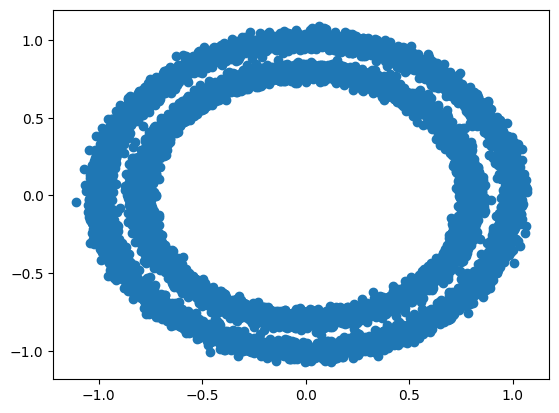

In [ ]:
plt.scatter(X[: , 0], X[: , 1]);
plt.show()

In [ ]:
# @title training and testing data creating

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,
                                                       Y,
                                                       test_size=0.3,
                                                       random_state=42
                                                      )

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,)

(7000, 2) (3000, 2) (7000,) (3000,)


In [ ]:
# @title making the model , loss function , optimizer

# import

from torch import nn

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2,out_features=5)
    self.non_linearity=nn.ReLU()
    self.layer2= nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer2(self.non_linearity(self.layer1(x)))



In [ ]:
model_find_circles = CircleModel()




In [ ]:
# @title replecating using Sequential in nn

CirclemodelV2 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10), # Increased neurons
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=1) # Increased neurons
)


CirclemodelV2,CirclemodelV2.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=10, bias=True)
   (1): ReLU()
   (2): Linear(in_features=10, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.2700, -0.0696],
                       [-0.3493,  0.4186],
                       [ 0.5213, -0.4814],
                       [-0.0206,  0.6515],
                       [ 0.6172, -0.6782],
                       [-0.2452, -0.5283],
                       [-0.5356,  0.3882],
                       [-0.1083,  0.0169],
                       [-0.2786,  0.0147],
                       [ 0.4662,  0.4697]])),
              ('0.bias',
               tensor([ 0.6051,  0.3336, -0.2328,  0.5293,  0.4118,  0.6349, -0.3677,  0.3807,
                        0.4165,  0.6735])),
              ('2.weight',
               tensor([[-0.2536,  0.1364,  0.1151,  0.1198,  0.0501, -0.0129,  0.0067, -0.0801,
                         0.1296,  0.0198]])),
              ('2.bias', tensor([0.1833]))]))

In [ ]:
 # logit is the input to the softmax non-linearity (Some words sprayed)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = CirclemodelV2.parameters() , lr=0.1 ,momentum= .9)

In [ ]:
def accuracy(y_true,y_pred):
  correct= torch.eq(y_true,y_pred).sum().item()

  return (float(correct) / float(len(y_true))) *100



In [ ]:
# @title training loop


epoch=1000 # Increased epochs

# Convert Y_train and Y_test to tensors
Y_train_tensor = torch.from_numpy(Y_train).float().unsqueeze(1)
Y_test_tensor = torch.from_numpy(Y_test).float().unsqueeze(1)


for epochs in range(epoch):

  CirclemodelV2.train()

  f_out=CirclemodelV2(torch.from_numpy(X_train).float())

  y_pred=torch.round(torch.sigmoid(f_out))

  loss=loss_fn(f_out,Y_train_tensor) #version of Y_train
  test_accuracy= accuracy(Y_train_tensor,y_pred) # Calculate training accuracy

  optimizer.zero_grad()
  loss.backward() # Backpropagate the loss
  optimizer.step()

  CirclemodelV2.eval()

  with torch.inference_mode():
    test_logits=CirclemodelV2(torch.from_numpy(X_test).float()) # Convert X_test to tensor

    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,Y_test_tensor) # Use test_logits and the tensor version of Y_test

    test_accuracy = accuracy(Y_test_tensor,test_pred) # Use the tensor version of Y_test for accuracy

  if epochs % 100 == 0: # Print less frequently for more epochs
    print(f"Epoch: {epochs} \nTrain Loss: {loss.item():.5f}, Train_accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss.item():.5f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch: 0 
Train Loss: 0.70138, Train_accuracy: 48.70%
Test Loss: 0.70554, Test Accuracy: 48.70%
Epoch: 100 
Train Loss: 0.66689, Train_accuracy: 56.47%
Test Loss: 0.66785, Test Accuracy: 56.47%
Epoch: 200 
Train Loss: 0.57733, Train_accuracy: 89.03%
Test Loss: 0.57674, Test Accuracy: 89.03%
Epoch: 300 
Train Loss: 0.30115, Train_accuracy: 98.23%
Test Loss: 0.30212, Test Accuracy: 98.23%
Epoch: 400 
Train Loss: 0.13306, Train_accuracy: 99.43%
Test Loss: 0.13666, Test Accuracy: 99.43%
Epoch: 500 
Train Loss: 0.07751, Train_accuracy: 99.50%
Test Loss: 0.08176, Test Accuracy: 99.50%
Epoch: 600 
Train Loss: 0.05384, Train_accuracy: 99.67%
Test Loss: 0.05818, Test Accuracy: 99.67%
Epoch: 700 
Train Loss: 0.04120, Train_accuracy: 99.73%
Test Loss: 0.04551, Test Accuracy: 99.73%
Epoch: 800 
Train Loss: 0.03340, Train_accuracy: 99.80%
Test Loss: 0.03765, Test Accuracy: 99.80%
Epoch: 900 
Train Loss: 0.02824, Train_accuracy: 99.83%
Test Loss: 0.03226, Test Accuracy: 99.83%


In [ ]:
# @title
# why the F**k is it not learning


# cause it is underfitting you are just trying to fit circle with line hence it lends on the avrage

In [ ]:
import requests

from pathlib import Path

if Path('helper_functions.py').is_file():
  print("File alresy exists")

else:
  print("Loading file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)






File alresy exists


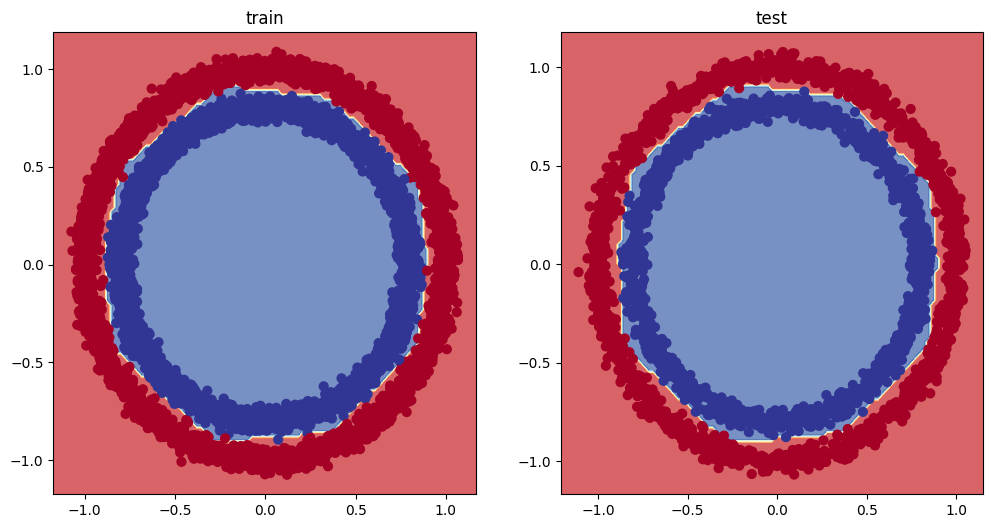

In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(CirclemodelV2,torch.from_numpy(X_train).float(),torch.from_numpy(Y_train).float())

plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(CirclemodelV2,torch.from_numpy(X_test).float(),torch.from_numpy(Y_test).float())



In [ ]:
# @title multiclass classification

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

classes=4
features=2


In [ ]:
X_blob,Y_blob = make_blobs(1000,features,centers=classes,cluster_std=1.3)

X_blob,Y_blob = torch.from_numpy(X_blob).float(),torch.from_numpy(Y_blob).float()


X_train,X_test ,Y_train,Y_test = train_test_split(X_blob,Y_blob,test_size=0.7)

X_blob.shape , Y_blob.shape

Y_blob[:5]

tensor([2., 2., 2., 1., 0.])

[]

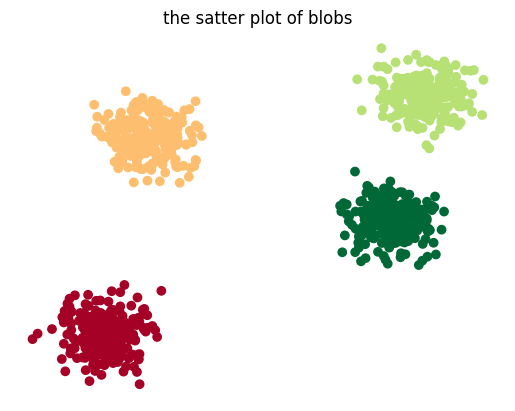

In [ ]:
import matplotlib.pyplot as plt

plt.title("the satter plot of blobs")
plt.scatter(x=X_blob[:,0],y=X_blob[:,1],c=Y_blob , cmap= plt.cm.RdYlGn_r)
plt.axis(False)
plt.plot()

In [ ]:
# @title multiclass classification model

device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
  def __init__(self, input_feature , output_feature , hidden_unit=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_feature,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit, out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit, out_features=output_feature)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

In [ ]:

classify_blobs= BlobModel(input_feature=2,output_feature=4)


loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=classify_blobs.parameters() , lr=0.01 , momentum=0.9 )



In [ ]:
# @title training loop

epoches = 3000 # Increased epochs

losses_train=[]
losses_test=[]

for epoch in range(epoches):

  classify_blobs.train()

  y_pred=classify_blobs(X_train)

  loss=loss_fn(y_pred,Y_train.long())

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()


  y_train_pred_labels = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
  train_accuracy = accuracy(Y_train.long(), y_train_pred_labels)
  classify_blobs.eval()
  with torch.inference_mode():
    y_test_pred=classify_blobs(X_test)

    test_loss=loss_fn(y_test_pred,Y_test.long())
    y_test_pred_labels = torch.argmax(torch.softmax(y_test_pred, dim=1), dim=1)
    test_accuracy = accuracy(Y_test.long(), y_test_pred_labels)


  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {train_accuracy:.2f}% | Test Loss: {test_loss.item():.4f} | Test Accuracy: {test_accuracy:.2f}%")

Epoch: 0 | Train Loss: 1.9215 | Train Accuracy: 0.00% | Test Loss: 1.9218 | Test Accuracy: 0.00%
Epoch: 100 | Train Loss: 0.0801 | Train Accuracy: 100.00% | Test Loss: 0.0790 | Test Accuracy: 99.86%
Epoch: 200 | Train Loss: 0.0056 | Train Accuracy: 100.00% | Test Loss: 0.0066 | Test Accuracy: 100.00%
Epoch: 300 | Train Loss: 0.0028 | Train Accuracy: 100.00% | Test Loss: 0.0040 | Test Accuracy: 99.86%
Epoch: 400 | Train Loss: 0.0018 | Train Accuracy: 100.00% | Test Loss: 0.0032 | Test Accuracy: 99.86%
Epoch: 500 | Train Loss: 0.0014 | Train Accuracy: 100.00% | Test Loss: 0.0028 | Test Accuracy: 99.86%
Epoch: 600 | Train Loss: 0.0011 | Train Accuracy: 100.00% | Test Loss: 0.0026 | Test Accuracy: 99.86%
Epoch: 700 | Train Loss: 0.0009 | Train Accuracy: 100.00% | Test Loss: 0.0024 | Test Accuracy: 99.86%
Epoch: 800 | Train Loss: 0.0008 | Train Accuracy: 100.00% | Test Loss: 0.0023 | Test Accuracy: 99.86%
Epoch: 900 | Train Loss: 0.0007 | Train Accuracy: 100.00% | Test Loss: 0.0023 | Test A

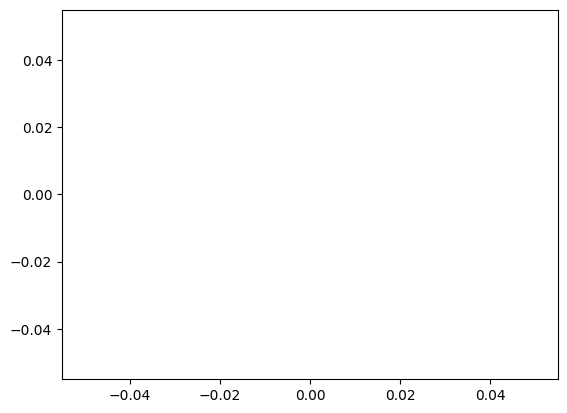

In [ ]:
plt.plot(losses_test)

plt.plot(losses_train)
plt.show()

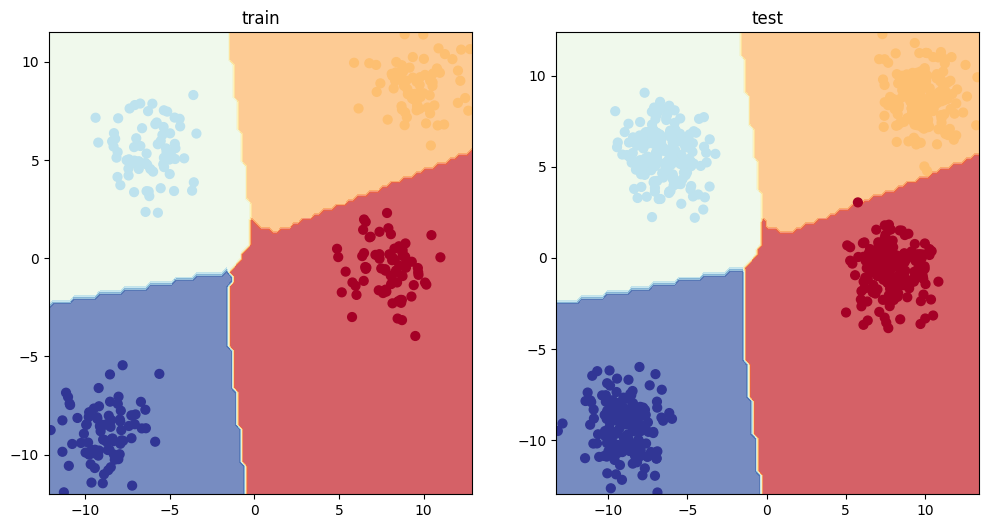

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(classify_blobs,X_train,Y_train)

plt.subplot(1,2,2)
plt.title("test")

plot_decision_boundary(classify_blobs,X_test,Y_test)


In [ ]:
# @title evaluvating


# accuracy

# precission

# recall

# F1 -score

# Confusion Matrix

# Classification Report


from torchmetrics import Accuracy

torch_mat_accuracy= Accuracy()